# Project 1

# QUESTIONS:

Graphical Analysis and Predictions: Determine using graphically whether the customers are purchasing the health insurance based on their age group and their estimated salary and predict the result on the age group:
Age 30, Salary 87,000
Age 40, No Salary
Age 40, Salary 100,000
Age 50, No Salary
Graphical Analysis and Predictions: Repeat the same process for this set of age and salary scenarios:
Age 18, No Salary
Age 22, Salary 600,000
Age 35, Salary 2,500,000
Age 60, Salary 100,000,000
Hypotheses and Assumptions: Make your hypothesis or assumptions based on the inference from the data and justify your assumptions by testing it on the built accurate model. Example : You might make assumptions such as:
Younger individuals with higher salaries are more likely to purchase health insurance.
Older individuals with higher salaries might be less inclined to purchase health insurance.
Salary might have a stronger impact on insurance purchasing behavior than age.
You can then test these assumptions using your accurate AI model. For example, you could run simulations where you manipulate age and salary inputs to observe their effects on insurance purchasing predictions.

Lessons Learned and Real-Life Application:  What did you learn from this study and how do you like to apply in real life projects? Give two case studies or scenarios where you will use these AI Algorithms.

## A) Logistic Regression

C:\Users\HP\AppData\Local\Temp\ipykernel_7108\424083874.py:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1], c=ListedColormap(('purple','blue'))(i), label= j)


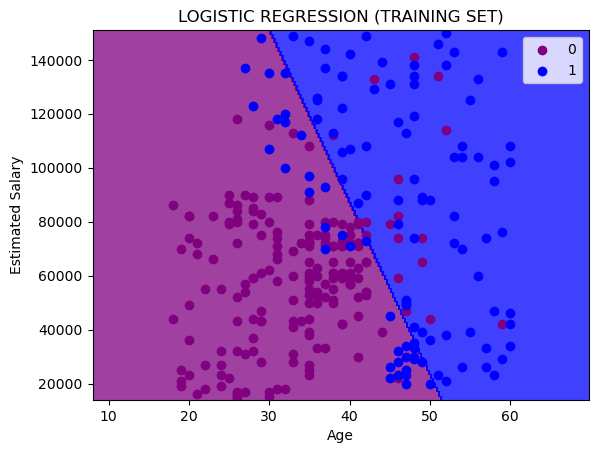

C:\Users\HP\AppData\Local\Temp\ipykernel_7108\424083874.py:56: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1], c=ListedColormap(('purple','blue'))(i), label= j)


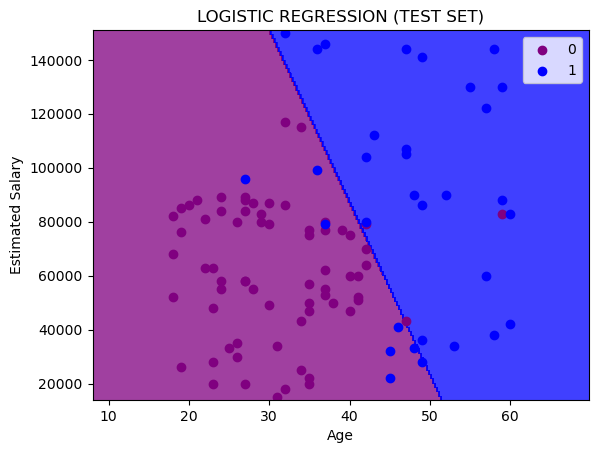

In [2]:
#import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ds=pd.read_csv('Social_Network_Ads.csv')
x= ds.iloc[:,:-1].values
y=ds.iloc[:,-1].values

#splitting

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.25, random_state = 0)

#Feature scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

#training

from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

#predicting test result
y_pred= classifier.predict(x_test)

# visualizing the data

from matplotlib.colors import ListedColormap
x_set, y_set= sc.inverse_transform(x_train),y_train
x1,x2= np.meshgrid(np.arange(start=x_set[:,0].min() - 10, stop = x_set[:,0].max()+ 10, step = 0.25),
                  np.arange(start=x_set[:,1].min() - 1000, stop= x_set[:,1].max()+ 1000, step = 0.25 ))
plt.contourf(x1,x2,classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),alpha=0.75, cmap = ListedColormap(('purple','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1], c=ListedColormap(('purple','blue'))(i), label= j)
plt.title('LOGISTIC REGRESSION (TRAINING SET)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

from matplotlib.colors import ListedColormap
x_set, y_set= sc.inverse_transform(x_test),y_test
x1,x2= np.meshgrid(np.arange(start=x_set[:,0].min() - 10, stop = x_set[:,0].max()+ 10, step = 0.25),
                  np.arange(start=x_set[:,1].min() - 1000, stop= x_set[:,1].max()+ 1000, step = 0.25 ))
plt.contourf(x1,x2,classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),alpha=0.75, cmap = ListedColormap(('purple','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1], c=ListedColormap(('purple','blue'))(i), label= j)
plt.title('LOGISTIC REGRESSION (TEST SET)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [3]:
#checking the accuracy 
from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(y_test,y_pred)
accuracy= accuracy_score(y_test,y_pred)
print('The accuracy of our model is: ', accuracy)

The accuracy of our model is:  0.89


#### Predicting data

In [11]:
print('Likelihood of age 30 salary 87000 buying insurance is :',classifier.predict(sc.transform([[30,87000]])))


Likelihood of age 30 salary 87000 buying insurance is : [0]


In [3]:
print('Likelihood of age 40 with salary 0 buying insurance is :',classifier.predict(sc.transform([[40,0]])))

Likelihood of age 40 with salary 0 buying insurance is : [0]


In [4]:
print('Likelihood of age 40 with salary 100,000 buying insurance is : ',classifier.predict(sc.transform([[40,100000]])))

Likelihood of age 40 with salary 100,000 buying insurance is :  [1]


In [5]:
print('Likelihood of age 50 with salary 0 buying insurance is : ',classifier.predict(sc.transform([[50,0]])))

Likelihood of age 50 with salary 0 buying insurance is :  [0]


In [6]:
print('Likelihood of age 18 with salary 0 buying insurance is : ',classifier.predict(sc.transform([[18,0]])))

Likelihood of age 18 with salary 0 buying insurance is :  [0]


In [7]:
print('Likelihood of age 22 with salary 600,000 buying insurance is : ',classifier.predict(sc.transform([[22,600000]])))

Likelihood of age 22 with salary 600,000 buying insurance is :  [1]


In [8]:
print('Likelihood of age 35 with salary 2,500,000 buying insurance is : ',classifier.predict(sc.transform([[35,2500000]])))

Likelihood of age 35 with salary 2,500,000 buying insurance is :  [1]


In [9]:
print('Likelihood of age 60 with salary 100,000,000 buying insurance is : ',classifier.predict(sc.transform([[60,100000000]])))

Likelihood of age 60 with salary 100,000,000 buying insurance is :  [1]


#### Hypothesis and Assumptions :-

###### 1 : Younger individuals are unlikely to buy insurance. 
###### 2 : Younger individuals with low income are least likely to purchase an insurance.
###### 3 : Older people are more likely to buy insurance.
###### 4 : People around the age or 45-65 are most likely to buy insurance.
###### 5 : Age plays more important role than salary

### Testing the assumptions

In [10]:
#1. Which was proven wrong.
print('Likelihood of age 18 with salary 100,000 buying insurance is : ',classifier.predict(sc.transform([[18,10000]])))

Likelihood of age 18 with salary 100,000 buying insurance is :  [0]


In [11]:
print('Likelihood of age 20 with salary 550000 buying insurance is : ',classifier.predict(sc.transform([[20,550000]])))

Likelihood of age 20 with salary 550000 buying insurance is :  [1]


In [12]:
print('Likelihood of age 23 with salary 200000 buying insurance is : ',classifier.predict(sc.transform([[23,200000]])))

Likelihood of age 23 with salary 200000 buying insurance is :  [1]


In [13]:
print('Likelihood of age 28 with salary 100000 buying insurance is : ',classifier.predict(sc.transform([[28,100000]])))

Likelihood of age 28 with salary 100000 buying insurance is :  [0]


In [14]:
print('Likelihood of age 35 with salary 700000 buying insurance is : ',classifier.predict(sc.transform([[35,700000]])))

Likelihood of age 35 with salary 700000 buying insurance is :  [1]


In [15]:
#2 Which was proven right
print('Likelihood of age 20 with salary 100000 buying insurance is : ',classifier.predict(sc.transform([[20,100000]])))

Likelihood of age 20 with salary 100000 buying insurance is :  [0]


In [16]:
print('Likelihood of age 35 with salary 5,00,000 buying insurance is : ',classifier.predict(sc.transform([[35,500000]])))

Likelihood of age 35 with salary 5,00,000 buying insurance is :  [1]


In [17]:
print('Likelihood of age 35 with salary 1,00,000 buying insurance is : ',classifier.predict(sc.transform([[35,100000]])))

Likelihood of age 35 with salary 1,00,000 buying insurance is :  [0]


In [18]:
print('Likelihood of age 25 with salary 50000 buying insurance is : ',classifier.predict(sc.transform([[25,50000]])))

Likelihood of age 25 with salary 50000 buying insurance is :  [0]


In [19]:
print('Likelihood of age 32 with salary 50000 buying insurance is : ',classifier.predict(sc.transform([[32,50000]])))

Likelihood of age 32 with salary 50000 buying insurance is :  [0]


In [20]:
#3 Which was proven right.
print('Likelihood of age 50 with salary 2,00,000 buying insurance is : ',classifier.predict(sc.transform([[50,200000]])))

Likelihood of age 50 with salary 2,00,000 buying insurance is :  [1]


In [21]:
print('Likelihood of age 18 with salary 2,00,000 buying insurance is : ',classifier.predict(sc.transform([[18,200000]])))

Likelihood of age 18 with salary 2,00,000 buying insurance is :  [0]


In [22]:
print('Likelihood of age 20 with salary 12,000 buying insurance is : ',classifier.predict(sc.transform([[20,12000]])))

Likelihood of age 20 with salary 12,000 buying insurance is :  [0]


In [23]:
print('Likelihood of age 75 with salary 12000 buying insurance is : ',classifier.predict(sc.transform([[75,12000]])))

Likelihood of age 75 with salary 12000 buying insurance is :  [1]


In [24]:
print('Likelihood of age 71 with salary 2,20,000 buying insurance is : ',classifier.predict(sc.transform([[71,220000]])))

Likelihood of age 71 with salary 2,20,000 buying insurance is :  [1]


In [25]:
#4 Which was proved right
print('Likelihood of age 45 with salary 500000 buying insurance is : ',classifier.predict(sc.transform([[45,500000]])))

Likelihood of age 45 with salary 500000 buying insurance is :  [1]


In [26]:
print('Likelihood of age 52 with salary 2000000 buying insurance is : ',classifier.predict(sc.transform([[52,2000000]])))

Likelihood of age 52 with salary 2000000 buying insurance is :  [1]


In [27]:
print('Likelihood of age 50 with salary 234500 buying insurance is : ',classifier.predict(sc.transform([[50,234500]])))

Likelihood of age 50 with salary 234500 buying insurance is :  [1]


In [28]:
print('Likelihood of age 58 with salary 9156325 buying insurance is : ',classifier.predict(sc.transform([[58,9156325]])))

Likelihood of age 58 with salary 9156325 buying insurance is :  [1]


In [29]:
print('Likelihood of age 62 with salary 250000 buying insurance is : ',classifier.predict(sc.transform([[62,250000]])))

Likelihood of age 62 with salary 250000 buying insurance is :  [1]


In [30]:
#5 which was proved right
print('Likelihood of age 50 with salary 200,000 buying insurance is : ',classifier.predict(sc.transform([[50,200000]])))

Likelihood of age 50 with salary 200,000 buying insurance is :  [1]


In [31]:
print('Likelihood of age 21 with salary 200,000 buying insurance is : ',classifier.predict(sc.transform([[21,200000]])))

Likelihood of age 21 with salary 200,000 buying insurance is :  [0]


In [32]:
print('Likelihood of age 65 with salary 35000 buying insurance is : ',classifier.predict(sc.transform([[65,35000]])))

Likelihood of age 65 with salary 35000 buying insurance is :  [1]


In [33]:
print('Likelihood of age 38 with salary 35000 buying insurance is : ',classifier.predict(sc.transform([[38,35000]])))

Likelihood of age 38 with salary 35000 buying insurance is :  [0]


In [34]:
print('Likelihood of age 81 with salary 70000 buying insurance is : ',classifier.predict(sc.transform([[81,70000]])))

Likelihood of age 81 with salary 70000 buying insurance is :  [1]
